# mBuild Tutorial 03: Connecting Components with Ports

Description

In [2]:
%matplotlib notebook
from visualize import visualize
import mbuild as mb

We've already found that `Particles` can be connected (i.e. bonded) by using the `add_bond` routine; however, this does not actually move the atoms in space, and it would become burdensome to need to manually update the position of each atom. This is where [mBuild's `Port` class](http://mosdef-hub.github.io/mbuild/data_structures.html#mbuild.port.Port) comes into play. `Ports` in the most general sense define a location in space; however, in most cases these can be thought of as dangling bonds.

Let's test this functionality by using `Ports` instead of `add_bond` to create CH2. First, we'll create an empty `Compound` for CH2 that we will add three `Particles` to at unrealistic locations.

<IPython.core.display.Javascript object>


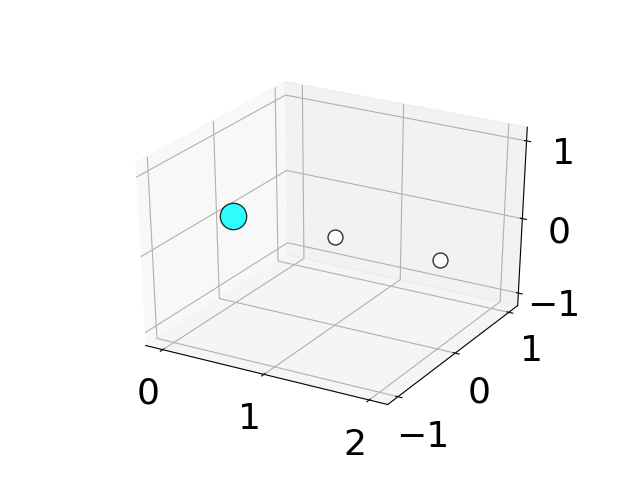

In [3]:
ch2 = mb.Compound()
carbon = mb.Particle(pos=[0.0, 0.0, 0.0], name='C')
hydrogen = mb.Particle(pos=[1.0, 0.0, 0.0], name='H')
hydrogen2 = mb.Particle(pos=[2.0, 0.0, 0.0], name='H')
ch2.add([carbon, hydrogen, hydrogen2])
visualize(ch2)

Now we'll instantiate the `Port` class. We can attach the `Port` to the carbon atom by using the `anchor` attribute. This allows mBuild to know which atoms to create bonds between when two `Ports` are connected. We can also provide an `orientation` vector to give our `Port` a desired direction, and can use the `separation` argument to shift our `Port` from the position of the anchor `Particle`. Since we're going to be connecting to a hydrogen, we will shift our `Port` roughly half of a C-H bond length.

In [4]:
port_C = mb.Port(anchor=carbon, orientation=[1, 0, 0], separation=0.05)
type(port_C)

mbuild.port.Port

We now need to add this `Port` to the containment hierarchy of our CH2 molecule, again using the `add` method. We can also provide a descriptive label for our `Port` that we can use for easy access.

In [5]:
ch2.add(port_C, label='right')
ch2['right']

<Port 0 particles, non-periodic, 0 bonds, id: 4619600448>

Now we need to add another `Port` to the carbon `Particle` and one `Port` to each hydrogen `Particle`, giving each of these distinct labels. We'll first add another `Port` to carbon and a `Port` on one of the hydrogens.

<IPython.core.display.Javascript object>


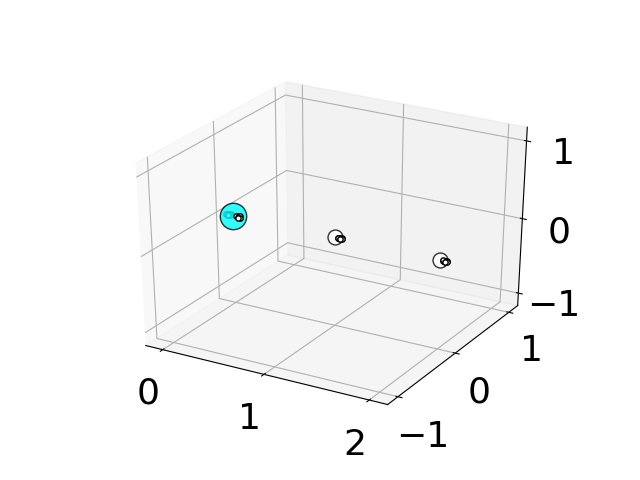

In [6]:
port2_C = mb.Port(anchor=carbon, orientation=[-1, 0, 0], separation=0.05)
ch2.add(port2_C, label='left')

port_H = mb.Port(anchor=hydrogen, orientation=[1, 0, 0], separation=0.05)
ch2.add(port_H, label='H1')

port2_H = mb.Port(anchor=hydrogen2, orientation=[1, 0, 0], separation=0.05)
ch2.add(port2_H, label='H2')

visualize(ch2)

The `force_overlap` function can be used to force the overlap of two `Ports` by performing a coordinate transform on one of the two `Compounds` that should be connected. This will also create a bond between the anchor `Particles` of each `Port`. We'll use this function here to connect one hydrogen to the carbon `Particle`.

<IPython.core.display.Javascript object>


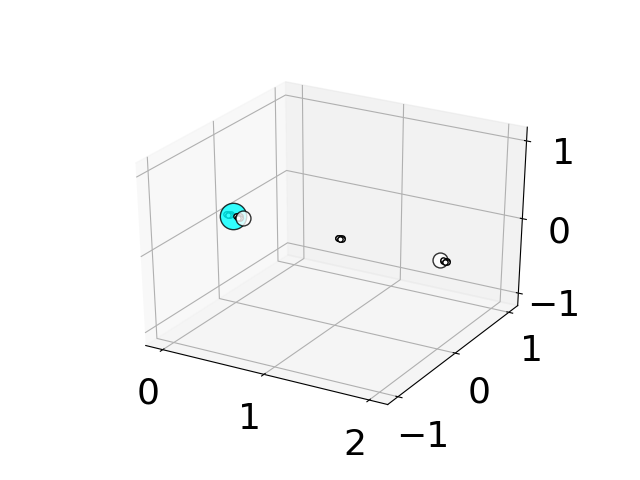

In [7]:
mb.force_overlap(move_this=hydrogen,
                 from_positions=ch2['H1'],
                 to_positions=ch2['right'])
visualize(ch2)

<IPython.core.display.Javascript object>


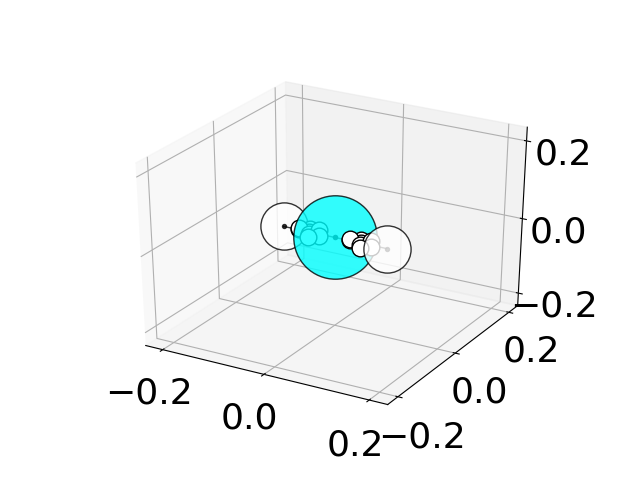

In [8]:
mb.force_overlap(move_this=hydrogen2,
                 from_positions=ch2['H2'],
                 to_positions=ch2['left'])
visualize(ch2)